In [102]:
# Imports :)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
# Print sample of the CSV to make sure it is reading it
data = pd.read_csv('D1.csv')
data

,weather_datetime,solar_datetime,solarRadiation,uvHigh,winddirAvg,humidityHigh,humidityLow,humidityAvg,qcStatus,tempHigh,...,windchillAvg,heatindexHigh,heatindexLow,heatindexAvg,pressureMax,pressureMin,pressureTrend,precipRate,precipTotal,DC
0,2/7/20 14:29,2/7/20 14:29,627.70,7,195,24,24,24,-1,65,...,65,65,65,65,30.06,30.05,0.60,0.0,0.0,42.036
1,2/7/20 14:34,2/7/20 14:34,617.31,7,129,24,23,23,-1,68,...,67,68,66,67,30.06,30.05,-0.15,0.0,0.0,42.126
2,2/7/20 14:39,2/7/20 14:39,608.13,6,108,24,23,23,-1,68,...,67,68,67,67,30.06,30.05,0.00,0.0,0.0,42.264
3,2/7/20 14:44,2/7/20 14:44,582.57,6,87,25,24,24,-1,67,...,66,67,66,66,30.06,30.05,-0.15,0.0,0.0,42.204
4,2/7/20 14:49,2/7/20 14:49,571.67,6,38,24,24,24,-1,66,...,66,66,66,66,30.05,30.04,-0.15,0.0,0.0,42.360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7955,3/30/20 21:29,3/30/20 21:29,0.00,0,153,25,25,25,1,62,...,62,62,62,62,30.25,30.24,0.00,0.0,0.0,0.030
7956,3/30/20 21:34,3/30/20 21:34,0.00,0,160,25,25,25,1,62,...,62,62,62,62,30.25,30.24,0.00,0.0,0.0,0.024
7957,3/30/20 21:39,3/30/20 21:39,0.00,0,188,25,25,25,1,62,...,62,62,62,62,30.25,30.24,0.00,0.0,0.0,0.030
7958,3/30/20 21:44,3/30/20 21:44,0.00,0,153,25,25,25,1,62,...,62,62,62,62,30.25,30.24,-0.15,0.0,0.0,0.024


In [104]:
# We don't need these -- drop!
data=data.drop(columns=['weather_datetime', 'solar_datetime'])

In [105]:
# Finding the correlations, lowest to highest
data.corr()['DC'].sort_values()

,DC
winddirAvg,-0.280851
humidityLow,-0.249210
humidityAvg,-0.247262
humidityHigh,-0.243070
qcStatus,-0.100838
dewptLow,-0.055491
dewptAvg,-0.044666
dewptHigh,-0.033934
pressureTrend,-0.029149
precipRate,0.003305


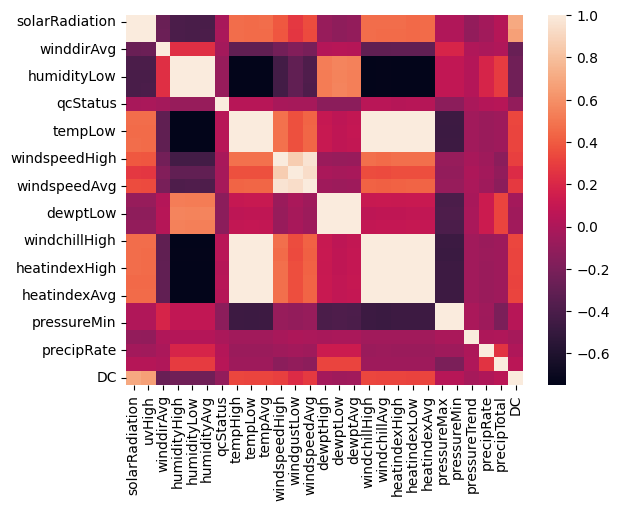

In [106]:
# Making a heatmap to visualize
sns.heatmap(data.corr());

In [107]:
# importing from sklearn for model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor

In [108]:
# After lots of testing and correlation, the best combo are these variables
X = data[['solarRadiation','uvHigh','windchillAvg','tempHigh', 'tempAvg']]
y = data['DC']

In [109]:
# Testing on D1 to see if we're right, on 20%, following 20-80 rule
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [110]:
# Gradient boost was best model, so using that
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [111]:
# Manipulating the parameters
params = {
    'n_estimators': 500,
    'learning_rate': 0.05,
    'max_depth': 4,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'subsample': 0.8,
    'loss': 'squared_error'
}
gbr = GradientBoostingRegressor(**params)

In [112]:
y_pred = model.predict(X_test)
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
print(df)

      Real Values  Predicted Values
1720       42.732         41.746871
1569        0.078          3.324352
1533        0.042          1.535990
1193        4.728          1.198145
3513       42.348         41.156362
...           ...               ...
1514        0.048          0.888741
265        42.552         40.542279
0          42.036         40.542279
1451       43.530         41.259241
4789        0.030          1.734040

[1592 rows x 2 columns]


In [113]:
# Test model score for train data
model.score(X_train, y_train)

0.9707388205819849

In [114]:
# Test model score for test data
model.score(X_test, y_test)

0.977542545220211

In [115]:
# Getting values
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) # This is the best

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 8.79642124242994
Root Mean Squared Error (RMSE): 2.965876134033574
Mean Absolute Error (MAE): 1.7554656654303948
R-squared (R2): 0.977542545220211


In [116]:
d2 = pd.read_csv('D2.csv')
d2

,weather_datetime,solar_datetime,solarRadiation,uvHigh,winddirAvg,humidityHigh,humidityLow,humidityAvg,qcStatus,tempHigh,...,windchillHigh,windchillAvg,heatindexHigh,heatindexLow,heatindexAvg,pressureMax,pressureMin,pressureTrend,precipRate,precipTotal
0,3/30/20 21:54,3/30/20 21:54,0.0,0,153,26,25,25,1,62,...,62,62,62,62,62,30.25,30.24,0.00,0,0
1,3/30/20 21:59,3/30/20 21:59,0.0,0,158,25,25,25,1,62,...,62,62,62,62,62,30.25,30.25,0.00,0,0
2,3/30/20 22:04,3/30/20 22:04,0.0,0,185,26,25,25,1,62,...,62,61,62,61,61,30.25,30.24,0.00,0,0
3,3/30/20 22:09,3/30/20 22:09,0.0,0,155,26,25,25,1,61,...,61,61,61,61,61,30.25,30.24,0.00,0,0
4,3/30/20 22:14,3/30/20 22:14,0.0,0,167,26,25,25,1,62,...,62,61,62,61,61,30.25,30.25,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7956,5/31/20 23:39,5/31/20 23:39,0.0,0,349,22,21,21,1,79,...,79,79,77,77,77,29.95,29.95,0.00,0,0
7957,5/31/20 23:44,5/31/20 23:44,0.0,0,5,22,22,22,1,78,...,78,78,77,77,77,29.95,29.94,0.00,0,0
7958,5/31/20 23:49,5/31/20 23:49,0.0,0,306,23,22,22,1,78,...,78,78,77,77,77,29.95,29.94,0.15,0,0
7959,5/31/20 23:54,5/31/20 23:54,0.0,0,327,23,23,23,1,78,...,78,78,77,76,77,29.96,29.94,0.15,0,0


In [117]:
new_data = data[['solarRadiation','uvHigh','windchillAvg','tempHigh', 'tempAvg']]
DC_predict = model.predict(new_data)
DC_predict

array([40.54227935, 39.80398123, 39.80398123, ...,  1.2441671 ,
        1.2441671 ,  1.2441671 ])

In [118]:
with open("answer.txt", "w") as f:
  for value in DC_predict:
    f.write(str(value) + "\n")